In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [14]:
BTC = yf.download('BTC-USD', start='2022-12-25', end='2022-12-26',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [15]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-25 00:00:00,16847.505859,16847.505859,16847.505859,16847.505859,16847.505859,0
2022-12-25 00:01:00,16846.718750,16846.718750,16846.718750,16846.718750,16846.718750,0
2022-12-25 00:02:00,16846.701172,16846.701172,16846.701172,16846.701172,16846.701172,0
2022-12-25 00:03:00,16846.535156,16846.535156,16846.535156,16846.535156,16846.535156,0
2022-12-25 00:04:00,16847.066406,16847.066406,16847.066406,16847.066406,16847.066406,0
...,...,...,...,...,...,...
2022-12-25 23:54:00,16838.351562,16838.351562,16838.351562,16838.351562,16838.351562,0
2022-12-25 23:55:00,16838.541016,16838.541016,16838.541016,16838.541016,16838.541016,0
2022-12-25 23:56:00,16838.750000,16838.750000,16838.750000,16838.750000,16838.750000,612352


In [16]:
ETH = yf.download('ETH-USD', start='2022-12-25', end='2022-12-26',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [17]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-25 00:00:00,1221.171509,1221.171509,1221.171509,1221.171509,1221.171509,0
2022-12-25 00:01:00,1221.078735,1221.078735,1221.078735,1221.078735,1221.078735,0
2022-12-25 00:02:00,1221.049316,1221.049316,1221.049316,1221.049316,1221.049316,0
2022-12-25 00:03:00,1221.162964,1221.162964,1221.162964,1221.162964,1221.162964,0
2022-12-25 00:04:00,1221.225464,1221.225464,1221.225464,1221.225464,1221.225464,0
...,...,...,...,...,...,...
2022-12-25 23:54:00,1218.516968,1218.516968,1218.516968,1218.516968,1218.516968,51456
2022-12-25 23:55:00,1218.551880,1218.551880,1218.551880,1218.551880,1218.551880,0
2022-12-25 23:56:00,1218.557129,1218.557129,1218.557129,1218.557129,1218.557129,143616


In [18]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [19]:
S1_0

16847.505859375

In [20]:
S2_0

1221.1715087890625

In [44]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1437
mu_2 = lr2.mean() * 1437
sigma_1 = lr1.std() * np.sqrt(1437)
sigma_2 = lr2.std() * np.sqrt(1437)
rho = lr1.corr(lr2)
z_0 = 0.01
gamma = 0.4
delta = 1
T = 1
M = len(BTC)

In [45]:
rho

0.7991620934426088

In [46]:
mu_1

-0.00028090048787672876

In [47]:
mu_2

-0.0018094999077302315

In [48]:
sigma_1

0.004403504868981201

In [49]:
sigma_2

0.009326683582418812

In [50]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close']))
beta = result.slope

In [51]:
beta

2.9972274805864085

In [52]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [53]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

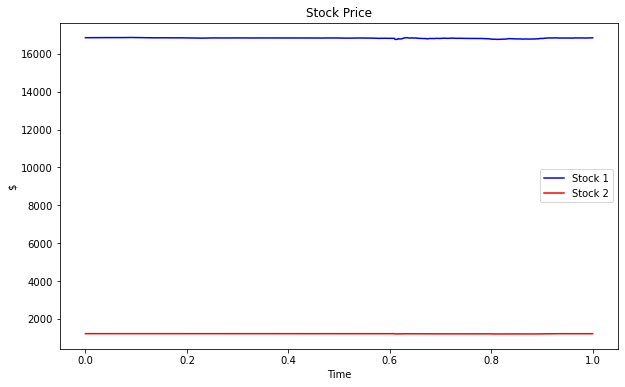

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

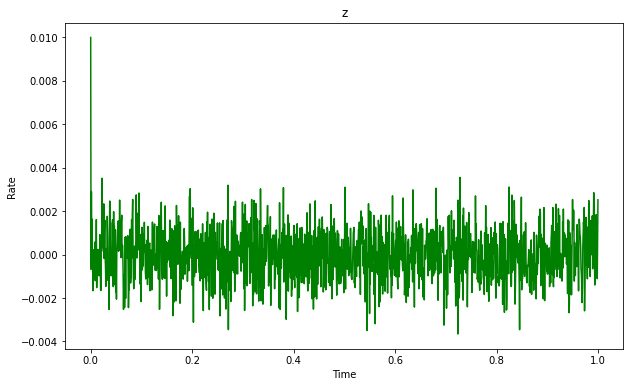

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [56]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

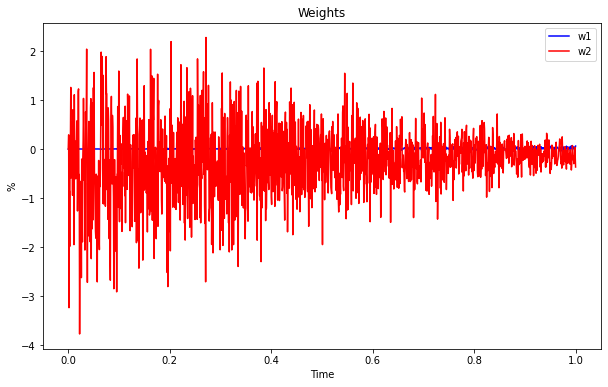

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

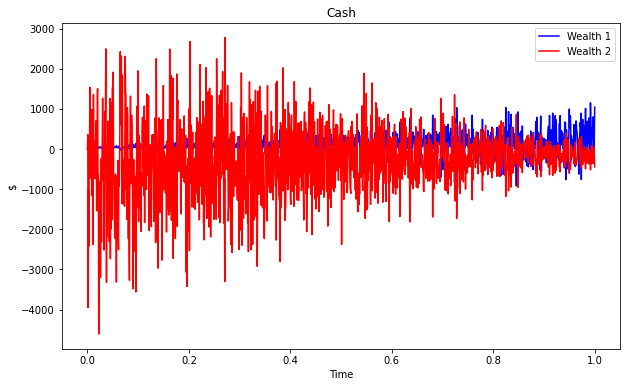

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [59]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

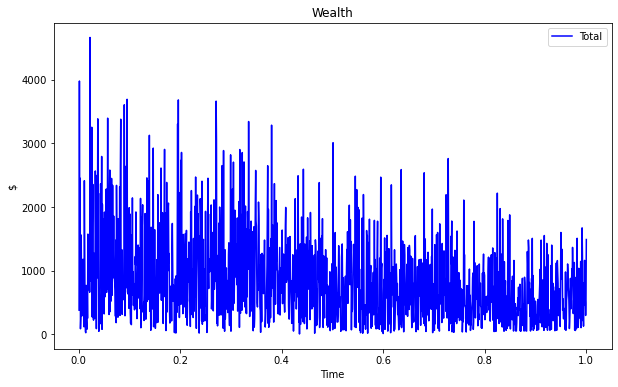

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [61]:
Wealth[1]

array([379.59437177])

In [62]:
Wealth[-1]

array([1489.03658456])

In [63]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([2.92270459])

In [64]:
Pi_1.mean()

0.004598773565374466

In [65]:
Pi_2.mean()

-0.2402412520481819

Text(0.5, 1.0, 'Comparison')

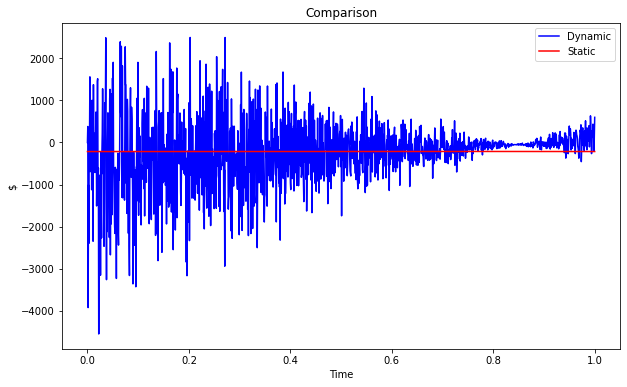

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [67]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [68]:
BTC = yf.download('BTC-USD', start='2022-12-25', end='2022-12-26',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [69]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-25 00:00:00,16847.505859,16847.505859,16847.505859,16847.505859,16847.505859,0
2022-12-25 00:01:00,16846.718750,16846.718750,16846.718750,16846.718750,16846.718750,0
2022-12-25 00:02:00,16846.701172,16846.701172,16846.701172,16846.701172,16846.701172,0
2022-12-25 00:03:00,16846.535156,16846.535156,16846.535156,16846.535156,16846.535156,0
2022-12-25 00:04:00,16847.066406,16847.066406,16847.066406,16847.066406,16847.066406,0
...,...,...,...,...,...,...
2022-12-25 23:54:00,16838.351562,16838.351562,16838.351562,16838.351562,16838.351562,0
2022-12-25 23:55:00,16838.541016,16838.541016,16838.541016,16838.541016,16838.541016,0
2022-12-25 23:56:00,16838.750000,16838.750000,16838.750000,16838.750000,16838.750000,612352


In [70]:
ETH = yf.download('ETH-USD', start='2022-12-25', end='2022-12-26',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [71]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-25 00:00:00,1221.171509,1221.171509,1221.171509,1221.171509,1221.171509,0
2022-12-25 00:01:00,1221.078735,1221.078735,1221.078735,1221.078735,1221.078735,0
2022-12-25 00:02:00,1221.049316,1221.049316,1221.049316,1221.049316,1221.049316,0
2022-12-25 00:03:00,1221.162964,1221.162964,1221.162964,1221.162964,1221.162964,0
2022-12-25 00:04:00,1221.225464,1221.225464,1221.225464,1221.225464,1221.225464,0
...,...,...,...,...,...,...
2022-12-25 23:54:00,1218.516968,1218.516968,1218.516968,1218.516968,1218.516968,51456
2022-12-25 23:55:00,1218.551880,1218.551880,1218.551880,1218.551880,1218.551880,0
2022-12-25 23:56:00,1218.557129,1218.557129,1218.557129,1218.557129,1218.557129,143616


In [72]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [73]:
S1_0

16847.505859375

In [74]:
S2_0

1221.1715087890625

In [75]:
lr1 = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1))
lr2 = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1))
mu_1 = lr1.mean() * 1437
mu_2 = lr2.mean() * 1437
sigma_1 = lr1.std() * np.sqrt(1437)
sigma_2 = lr2.std() * np.sqrt(1437)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 0.3
delta = 0.5
beta = 0.6
T = 1
M = len(BTC)

In [76]:
rho

0.7991620934426088

In [77]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [78]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Stock Price')

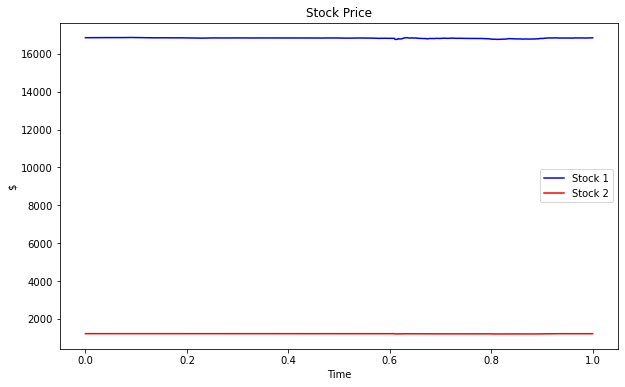

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Stock 1')
plt.plot(tt, S2, 'r', lw=1.5, label='Stock 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

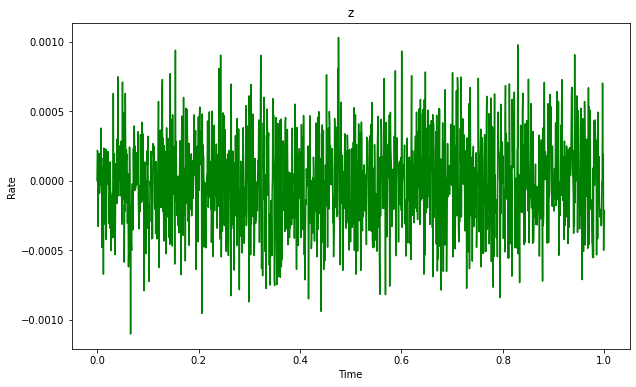

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [81]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

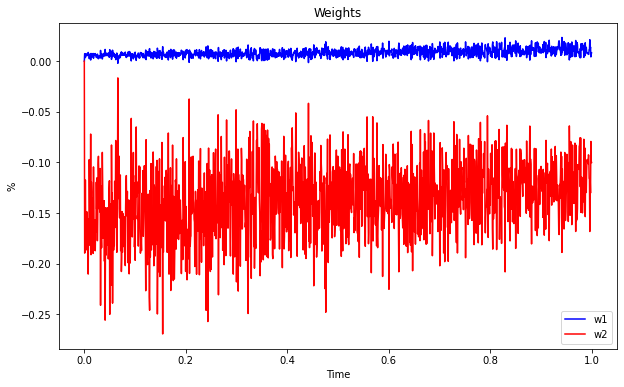

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

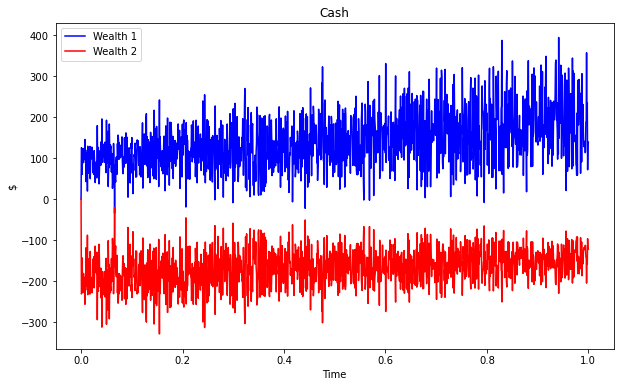

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth 1')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth 2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [84]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

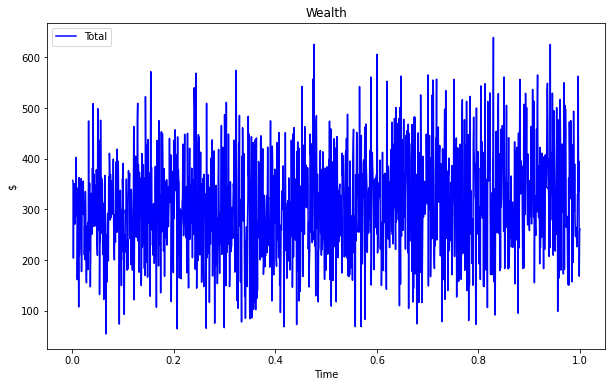

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [86]:
Wealth[1]

array([357.34771113])

In [87]:
Wealth[-1]

array([261.30652124])

In [88]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.26876117])

In [89]:
Pi_1.mean()

0.008479039493954458

In [90]:
Pi_2.mean()

-0.137116688420853

Text(0.5, 1.0, 'Comparison')

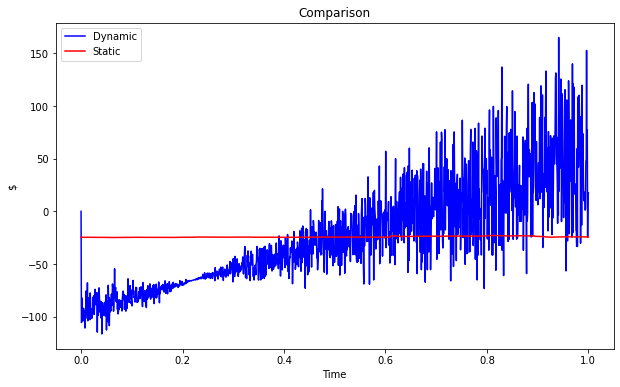

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')